In [1]:
class MaxHeap:
    def __init__(self):
        self.heap = []

    def insert(self, item):
        self.heap.append(item)
        self._heapify_up(len(self.heap) - 1)

    def delete(self, item):
        if len(self.heap) == 0:
            raise IndexError("Cannot delete from empty heap")

        index = self.heap.index(item)
        if index == -1:
            raise ValueError("Item not found in heap")

        last_item = self.heap.pop()
        if index < len(self.heap):
            self.heap[index] = last_item
            self._heapify_down(index)

    def get_max(self):
        if self.heap:
            return self.heap[0]
        else:
            return None

    def _heapify_up(self, index):
        parent = (index - 1) // 2
        if index > 0 and self.heap[index] > self.heap[parent]:
            self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
            self._heapify_up(parent)

    def _heapify_down(self, index):
        left = 2 * index + 1
        right = 2 * index + 2
        largest = index

        if left < len(self.heap) and self.heap[left] > self.heap[largest]:
            largest = left

        if right < len(self.heap) and self.heap[right] > self.heap[largest]:
            largest = right

        if largest != index:
            self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
            self._heapify_down(largest)

# Example usage:
if __name__ == "__main__":
    heap = MaxHeap()
    heap.insert(5)
    heap.insert(3)
    heap.insert(8)
    heap.insert(1)

    print("Max element:", heap.get_max())  # Output: 8

    heap.delete(8)

    print("Max element after deletion:", heap.get_max())  # Output: 5


Max element: 8
Max element after deletion: 5


In [2]:
import requests
from requests.exceptions import RequestException
import time

def download_urls(urls):
    max_retries = 3
    results = {}

    for url in urls:
        attempt = 0
        success = False
        while attempt < max_retries and not success:
            try:
                response = requests.get(url)
                if response.status_code == 200:
                    results[url] = response.content
                    success = True
                else:
                    results[url] = f"Failed to download: HTTP status code {response.status_code}"
                    success = True  # Consider the request as 'successful' as it has completed its attempts
            except RequestException as e:
                results[url] = f"Error downloading: {str(e)}"
                attempt += 1
                if attempt < max_retries:
                    time.sleep(1)  # Wait for 1 second before retrying
                else:
                    success = True  # Mark as successful to move to the next URL

    return results

# Example usage:
if __name__ == "__main__":
    urls = [
        "https://www.example.com",
        "https://www.nonexistenturl1234567890.com",
        "https://www.python.org"
    ]

    results = download_urls(urls)

    for url, result in results.items():
        print(f"URL: {url}")
        print(f"Result: {result}")
        print()


URL: https://www.example.com
Result: b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style

Mean Squared Error (MSE): 0.56
R-squared (R2 Score): 0.58


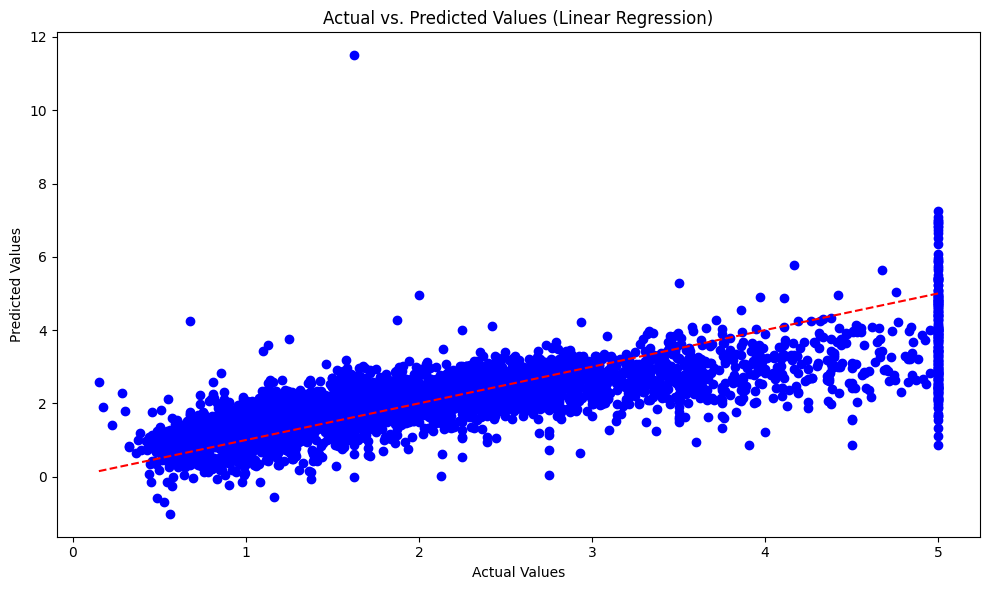

In [4]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california_housing = fetch_california_housing()

# Separate features (X) and target variable (y)
X = california_housing.data
y = california_housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2 Score): {r2:.2f}')

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def preprocess_data(df):
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Define preprocessing steps for numerical and categorical data
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse=False, drop='first'))
    ])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Preprocess the data
    processed_features = preprocessor.fit_transform(df)

    # Create a new DataFrame with preprocessed data
    preprocessed_df = pd.DataFrame(processed_features)

    return preprocessed_df

# Example usage:
if __name__ == "__main__":
    # Example DataFrame (replace with your actual DataFrame)
    data = {
        'Numeric1': [1, 2, None, 4, 5],
        'Numeric2': [10, 20, 30, None, 50],
        'Category': ['A', 'B', 'A', 'B', 'A']
    }
    df = pd.DataFrame(data)

    # Preprocess the DataFrame
    preprocessed_df = preprocess_data(df)

    print("Preprocessed DataFrame:")
    print(preprocessed_df)


Preprocessed DataFrame:
          0         1    2
0 -1.414214 -1.322876  0.0
1 -0.707107 -0.566947  1.0
2  0.000000  0.188982  0.0
3  0.707107  0.000000  1.0
4  1.414214  1.700840  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
def fibonacci_recursive(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

# Example usage:
if __name__ == "__main__":
    n = 10  # Example: Compute the 10th Fibonacci number
    fib_number = fibonacci_recursive(n)
    print(f"The {n}th Fibonacci number is: {fib_number}")


The 10th Fibonacci number is: 55


In [10]:
def divide_numbers(dividend, divisor):
    try:
        result = dividend / divisor
        return result
    except ZeroDivisionError:
        return "Error: Division by zero is not allowed."

# Example usage:
if __name__ == "__main__":
    dividend = 10
    divisor1 = 2
    divisor2 = 0

    # Normal division
    result1 = divide_numbers(dividend, divisor1)
    print(f"Result 1: {result1}")  # Output: 5.0

    # Division by zero
    result2 = divide_numbers(dividend, divisor2)
    print(f"Result 2: {result2}")  # Output: Error: Division by zero is not allowed.


Result 1: 5.0
Result 2: Error: Division by zero is not allowed.


In [13]:
import time
import functools

# Define the decorator
def measure_execution_time(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()  # Record start time
        result = func(*args, **kwargs)  # Call the decorated function
        end_time = time.time()  # Record end time
        execution_time = end_time - start_time  # Calculate execution time
        print(f"Execution time for {func.__name__}: {execution_time:.4f} seconds")
        return result
    return wrapper

# Apply the decorator to a computationally expensive function
@measure_execution_time
def compute_fibonacci(n):
    """Computes the nth Fibonacci number using recursion."""
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return compute_fibonacci(n-1) + compute_fibonacci(n-2)

# Example usage
if __name__ == "__main__":
    n = 10  # Change this value to test with different input sizes
    fib_number = compute_fibonacci(n)
    print(f"The {n}th Fibonacci number is: {fib_number}")


Execution time for compute_fibonacci: 0.0000 seconds
Execution time for compute_fibonacci: 0.0000 seconds
Execution time for compute_fibonacci: 0.0001 seconds
Execution time for compute_fibonacci: 0.0000 seconds
Execution time for compute_fibonacci: 0.0002 seconds
Execution time for compute_fibonacci: 0.0000 seconds
Execution time for compute_fibonacci: 0.0000 seconds
Execution time for compute_fibonacci: 0.0124 seconds
Execution time for compute_fibonacci: 0.0126 seconds
Execution time for compute_fibonacci: 0.0000 seconds
Execution time for compute_fibonacci: 0.0000 seconds
Execution time for compute_fibonacci: 0.0000 seconds
Execution time for compute_fibonacci: 0.0000 seconds
Execution time for compute_fibonacci: 0.0001 seconds
Execution time for compute_fibonacci: 0.0127 seconds
Execution time for compute_fibonacci: 0.0000 seconds
Execution time for compute_fibonacci: 0.0000 seconds
Execution time for compute_fibonacci: 0.0000 seconds
Execution time for compute_fibonacci: 0.0000 s

In [14]:
def calculate(num1, num2, operator):
    """
    Perform arithmetic operations based on the given operator.

    Parameters:
    - num1 (float): The first number.
    - num2 (float): The second number.
    - operator (str): The arithmetic operator (either '+', '-', '*', or '/').

    Returns:
    - float: The result of the arithmetic operation.
    - str: An error message if the operation is invalid or if there is a division by zero.
    """
    if operator == '+':
        return num1 + num2
    elif operator == '-':
        return num1 - num2
    elif operator == '*':
        return num1 * num2
    elif operator == '/':
        if num2 == 0:
            return "Error: Division by zero is not allowed."
        return num1 / num2
    else:
        return "Error: Invalid operator. Use '+', '-', '*', or '/'."

# Example usage:
if __name__ == "__main__":
    num1 = 10
    num2 = 5

    print(f"Addition: {calculate(num1, num2, '+')}")
    print(f"Subtraction: {calculate(num1, num2, '-')}")
    print(f"Multiplication: {calculate(num1, num2, '*')}")
    print(f"Division: {calculate(num1, num2, '/')}")
    print(f"Invalid Operation: {calculate(num1, num2, '%')}")
    print(f"Division by Zero: {calculate(num1, 0, '/')}")


Addition: 15
Subtraction: 5
Multiplication: 50
Division: 2.0
Invalid Operation: Error: Invalid operator. Use '+', '-', '*', or '/'.
Division by Zero: Error: Division by zero is not allowed.


In [17]:
import random
import string

def generate_password(length=12):
    """
    Generates a random password containing uppercase letters, lowercase letters,
    digits, and special characters.

    Parameters:
    - length (int): Length of the generated password. Default is 12.

    Returns:
    - str: The generated random password.
    """
    if length < 4:
        raise ValueError("Password length should be at least 4 characters to ensure all character types are included.")

    # Define character sets
    uppercase_letters = string.ascii_uppercase
    lowercase_letters = string.ascii_lowercase
    digits = string.digits
    special_characters = string.punctuation

    # Ensure the password includes at least one character from each set
    all_characters = uppercase_letters + lowercase_letters + digits + special_characters
    password_characters = [
        random.choice(uppercase_letters),
        random.choice(lowercase_letters),
        random.choice(digits),
        random.choice(special_characters)
    ]

    # Fill the rest of the password length with random characters from all sets
    password_characters += random.choices(all_characters, k=length - 4)

    # Shuffle the characters to ensure randomness
    random.shuffle(password_characters)

    # Convert list to string
    return ''.join(password_characters)

# Example usage:
if __name__ == "__main__":
    password_length = 12  # Adjust the length as needed
    password = generate_password(password_length)
    print(f"Generated password: {password}")


Generated password: m0|wXj%SHHzp


In [18]:
def transpose_matrix(matrix):
    """
    Transposes a given 2D list (matrix).

    Parameters:
    - matrix (list of lists): The 2D list to be transposed.

    Returns:
    - list of lists: The transposed matrix.
    """
    if not matrix or not matrix[0]:
        return []  # Return an empty list if the matrix is empty or has no columns

    # Use list comprehension to transpose the matrix
    transposed = [[row[i] for row in matrix] for i in range(len(matrix[0]))]

    return transposed

# Example usage:
if __name__ == "__main__":
    matrix = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ]

    transposed = transpose_matrix(matrix)
    print("Original matrix:")
    for row in matrix:
        print(row)

    print("\nTransposed matrix:")
    for row in transposed:
        print(row)

Original matrix:
[1, 2, 3]
[4, 5, 6]
[7, 8, 9]

Transposed matrix:
[1, 4, 7]
[2, 5, 8]
[3, 6, 9]
